"""
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/tutorials

Example notebooks:
    https://www.kaggle.com/squarex/house-prices-eda-stacking-xgb-lgb
"""

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, impute
from IPython.display import display
# from tqdm import tqdm
from matplotlib import pyplot

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import set_config

plt.style.use('ggplot')

In [6]:
train = pd.read_csv("/home/alex/PycharmProjects/ML4AT/data/kaggle/housePxPredict/train.csv")
validation = pd.read_csv("/home/alex/PycharmProjects/ML4AT/data/kaggle/housePxPredict/test.csv")

In [7]:
seed = 1

np.random.seed(seed=seed)

# EDA

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Check for NaN values visually

<AxesSubplot:>

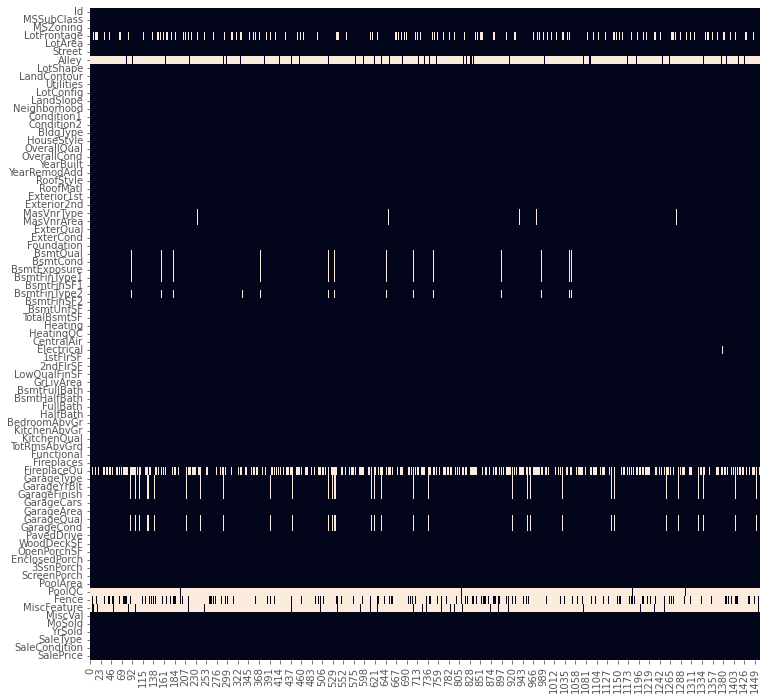

In [12]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(train.isna().T, yticklabels=True, ax=ax, cbar=False)

# Clean/Transform data

In [13]:
X = train.copy()
X.set_index('Id', inplace=True, drop=True)
X.drop(columns="SalePrice", inplace=True)

Y = train['SalePrice'].copy()

In [14]:
X_validation = validation.copy()
X_validation.set_index('Id', inplace=True, drop=True)

In [15]:
# Make sure no overlap b/w train and test Id
assert(len(X.index.intersection(X_validation.index))==0)

# Check if any lost rows
assert(len(X) == len(train))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

_df_combined = pd.concat([X_train.assign(set='train'),
                         X_test.assign(set='test')], axis=0)

In [28]:
numeric_features = ["MSSubClass"]
for i, j in enumerate(X.columns):
    if pd.api.types.is_numeric_dtype(X.dtypes[i]):
        numeric_features.append(j)
        
categorical_features = [c for c in X.columns if c not in numeric_features]

### Prob distribution of numeric values b/w train and test sets

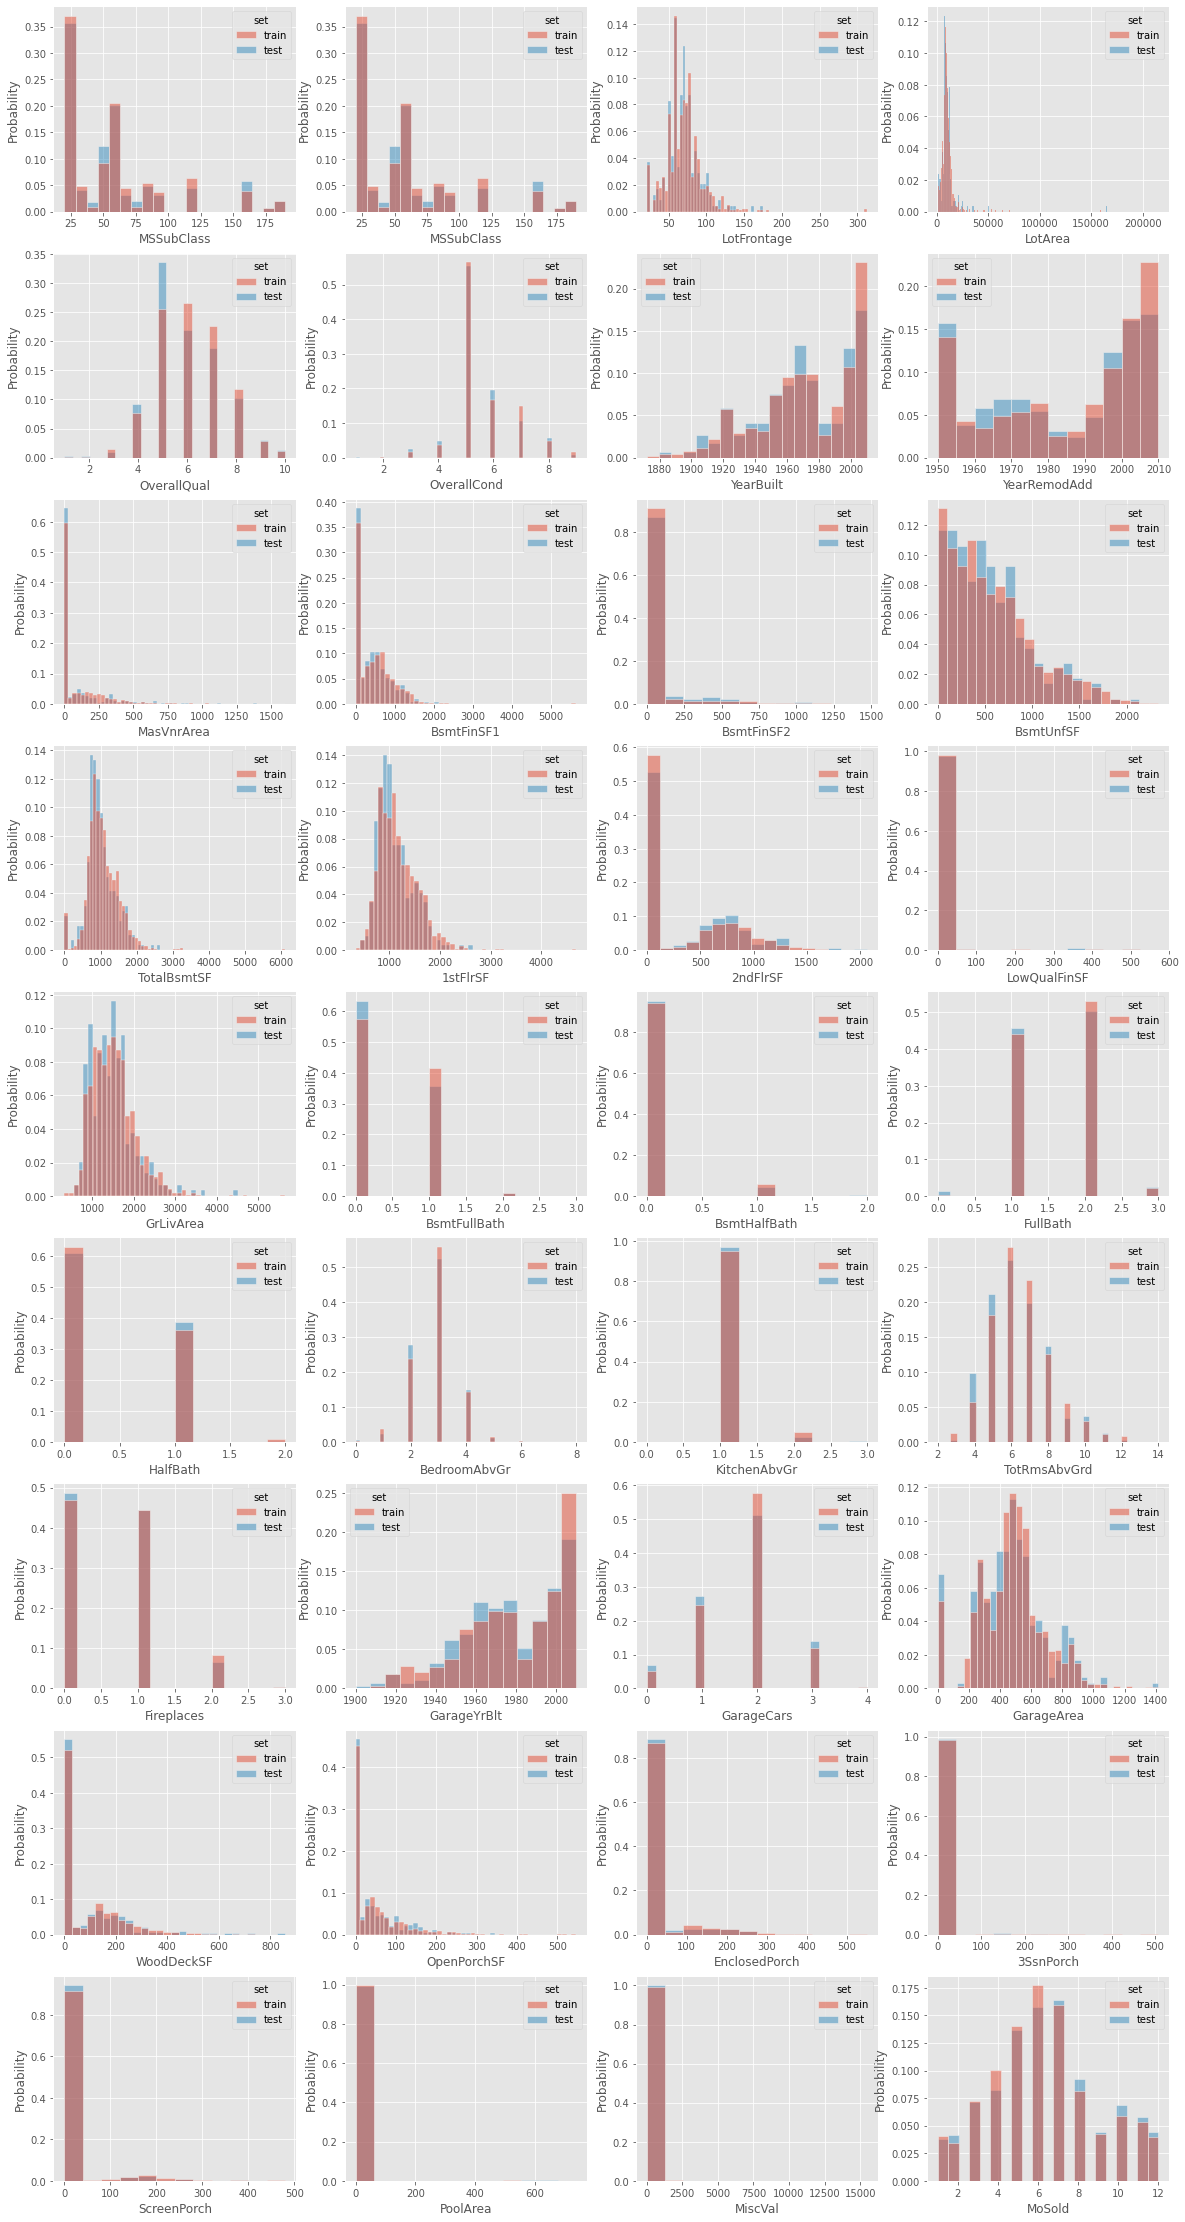

In [33]:
fig, axs = plt.subplots(ncols=4, nrows=9, figsize=(20, 40))

for col, ax in zip(numeric_features, axs.flat):
    sns.histplot(data=_df_combined,
                 x=col,
                 hue='set',
                 stat='probability',
                 #multiple='dodge',
                 common_norm=False,
                 ax=ax)



### Prob distribution of categoric values b/w train and test sets

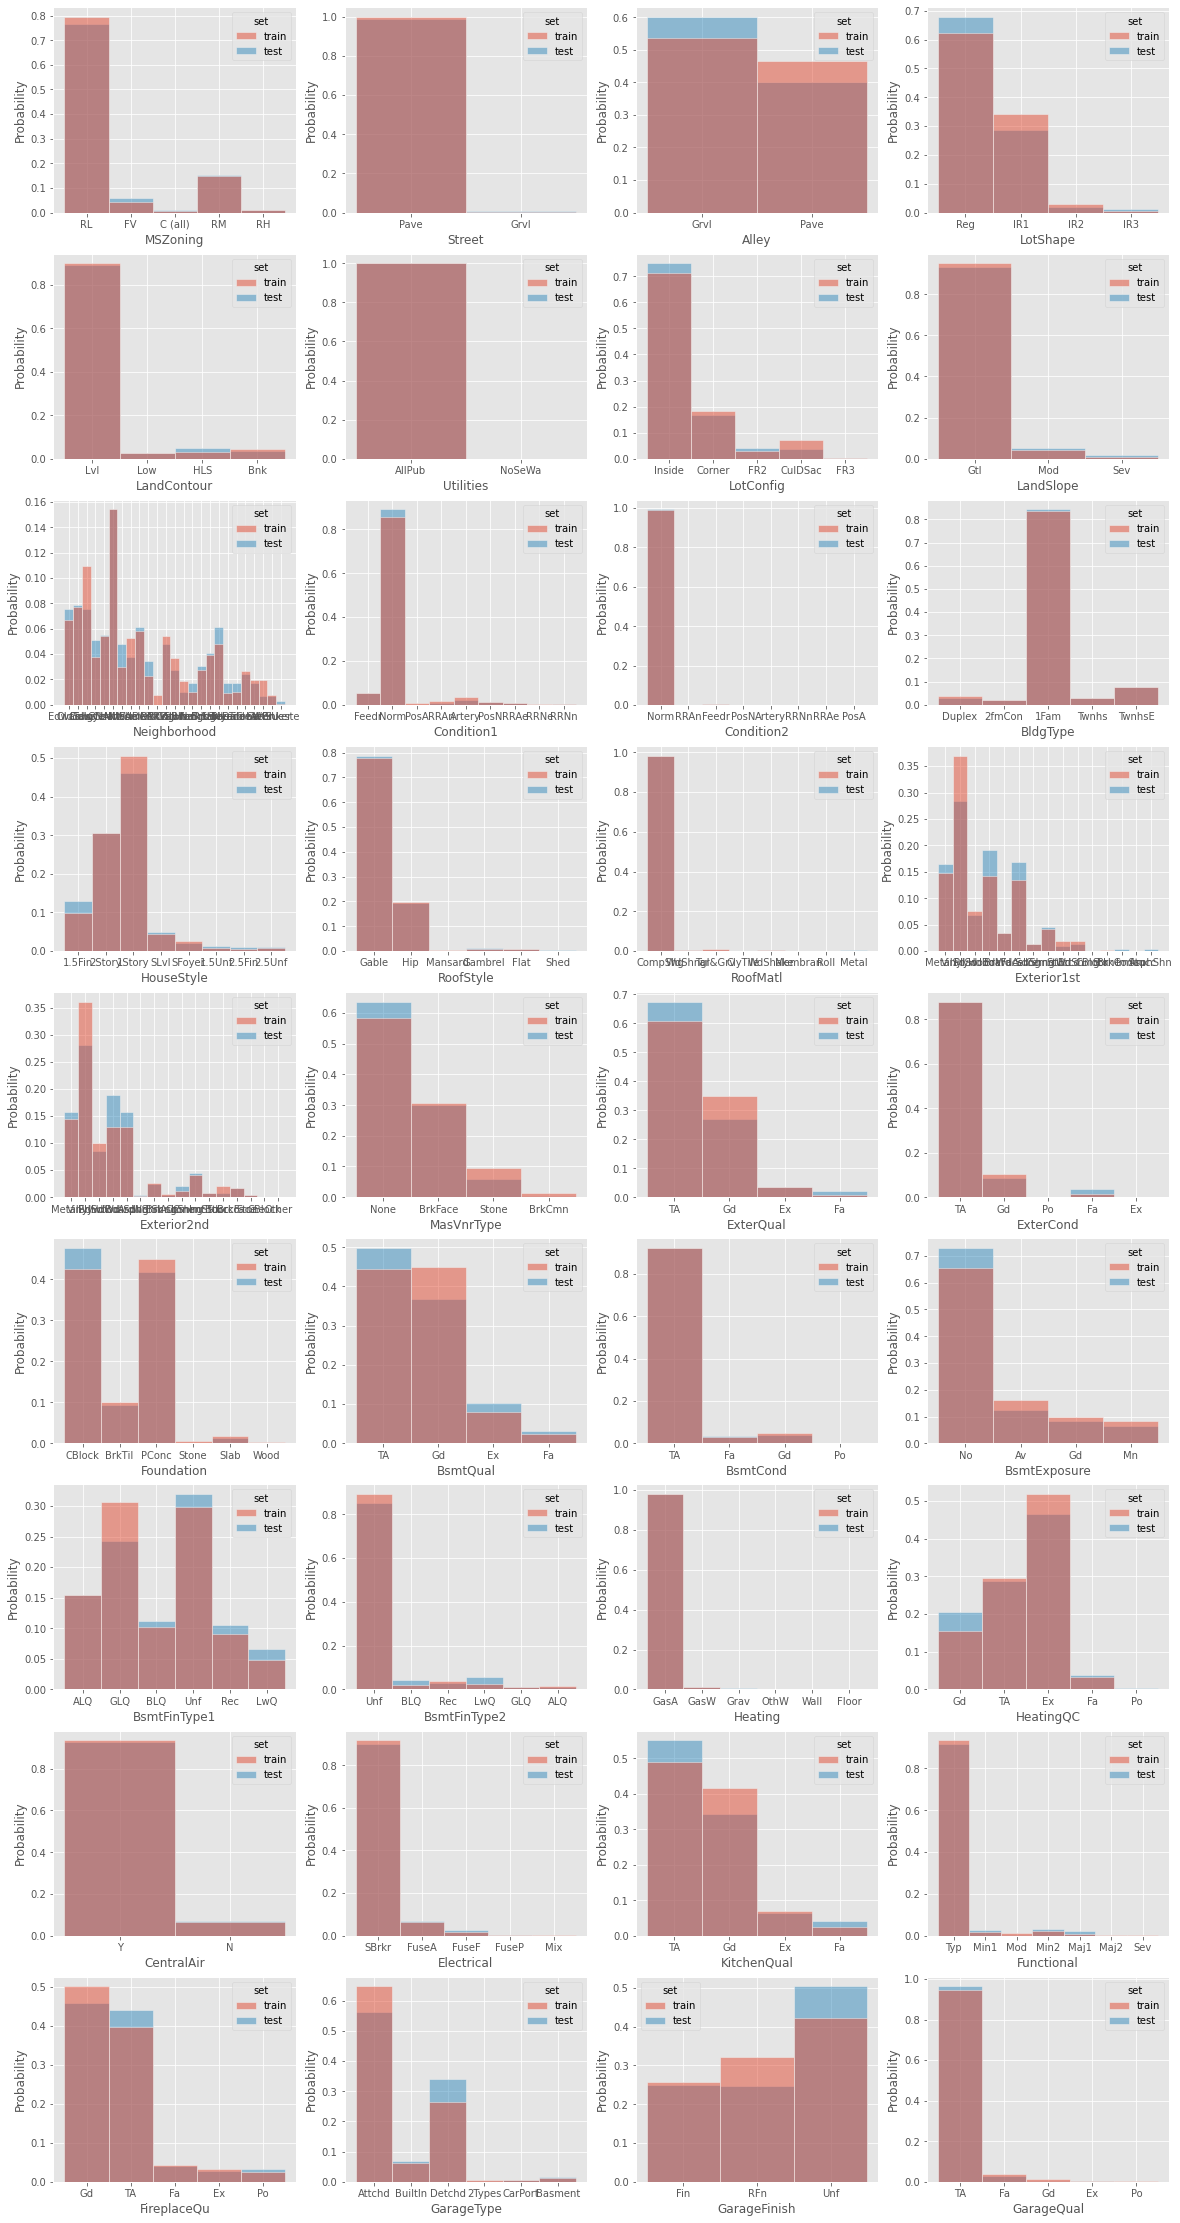

In [39]:
fig, axs = plt.subplots(ncols=4, nrows=9, figsize=(20, 40))

for col, ax in zip(categorical_features, axs.flat):
    sns.histplot(data=_df_combined,
                 x=col,
                 hue='set',
                 stat='probability',
                 #multiple='dodge',
                 common_norm=False,
                 ax=ax)



### Distribution of Sale Price

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

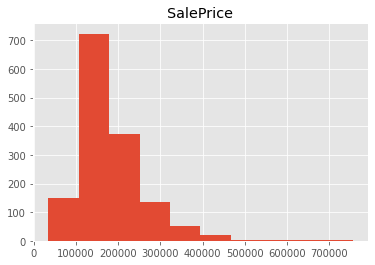

In [59]:
pd.DataFrame(Y).hist()

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

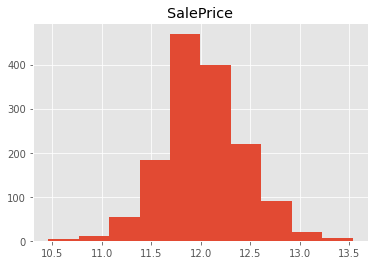

In [62]:
pd.DataFrame(np.log(Y)).hist()

In [66]:
X[numeric_features].corrwith(Y).sort_values(ascending=False).to_frame().head(10)

,0
WoodDeckSF,0.031979
3SsnPorch,0.028672
MSSubClass,0.024037
MSSubClass,0.024037
LotArea,0.023740
GarageCars,0.023405
OverallCond,0.019367
GarageYrBlt,0.018405
GarageArea,0.017453
BsmtFinSF2,0.016765


In [69]:
X[numeric_features].corrwith(np.log(Y)).sort_values(ascending=False).to_frame().head(10)

,0
WoodDeckSF,0.043372
GarageCars,0.027349
BsmtFinSF2,0.026509
LotArea,0.025273
GarageArea,0.021958
GarageYrBlt,0.019797
3SsnPorch,0.019049
OverallCond,0.018123
2ndFlrSF,0.012785
MSSubClass,0.009675


# Train models

In [29]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        # ('feature_selection', SelectFromModel(LinearRegression(), threshold='mean')),
        ("classifier",
         LinearRegression(),
         # LinearSVC(random_state=seed, tol=1e-5, max_iter=1e5),
         # SVC(),
         # KNeighborsClassifier()
         # DecisionTreeClassifier()
         # LogisticRegression()
         )
    ]
)
set_config(display="diagram")
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFl...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('classifier', LinearRegression())])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.864


In [ ]:
# scaler = SimpleImputer(strategy="median")
# scaler.fit(X[numeric_features])
# scaler.transform(X[numeric_features])
# model = LinearRegression()
# # fit the model
# model.fit(X[numeric_features].fillna(0), Y)
# model.score(X_test[numeric_features].fillna(0), y_test)
#
# importance = model.coef_
# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

# Prediction output

In [20]:
pred = pd.DataFrame({"Id":X_validation.index, "SalePrice":clf.predict(X_validation)})
pred.to_csv('/home/alex/PycharmProjects/ML4AT/data/kaggle/housePxPredict/submission.csv',index=None)
pred.head()

,Id,SalePrice
0,1461,122124.649443
1,1462,161495.330010
2,1463,188110.431338
3,1464,198257.734248
4,1465,208852.734973
